In this post, I will explain **all of machine learning** using nothing more than [polynomial fitting](https://en.wikipedia.org/wiki/Polynomial_regression) as an example.

OK, that was obviously a lie. But I will attempt to capture what I think are the *core concepts*, distilled primarily from Andrew Ng's excellent [Coursera course](https://www.coursera.org/learn/machine-learning). 

This post is somewhere between my personal notes and a tutorial for scientifically-minded newcomers, and I will try to cover:
- model, parameters and hyperparameters
- cost and loss functions
- optimization
- bias and variance
- regularization
- validation
- validation and training curves

If it seems like a lot for a single blog post, let me just say that if you have ever fitted a line through some data, you are probably familiar with many of these concepts already - and may know more about machine learning than you think!
<!--more-->

## A physicist's perspective
Remember what polynomial fitting is: we start with a set of data points $(x_i, y_i)$, and we look to approximate the dependence $y = p(x)$ between the independent variable $x$ and the dependent variable $y$. We can try the polynomial function $p(x) = a_n x^n + \dots + a_1 x + a_0$ (say $n=2$ for a quadratic fit). We find the polynomial coefficients $a_j$ by minimising the [least squares error](https://en.wikipedia.org/wiki/Least_squares) in $y_i$ (or, more likely, calling your favourite library function, such as `numpy.polyfit`).

The total least-squares error (over all points) is given by
$$J = \sum_i \left(p(x_i)-y_i\right)^2 = \min!$$

A closed-form solution can be found by solving $\frac{\partial J}{\partial a_j} = 0$ for $a_j$ - not that my aim is to repeat a standard result.

> In physics, the coefficients themselves often have significance - think [$\hbar$](https://en.wikipedia.org/wiki/Planck_constant), [$H_0$](https://en.wikipedia.org/wiki/Hubble%27s_law#Determining_the_Hubble_constant), or other personal favourites.

## Machine learning perspective


> In machine learning, we care about the *predictive power* of the model $p(x)$

From the machine learning perspective, above we solved a supervised regression problem with one feature and one target, by using a linear model with additional polynomial features. To our credit, we minimized the least squares loss to find the optimal parameter values. But otherwise, we were rather lazy - having not considered model selection, feature scaling, regularization, hyperparameter tuning, testing *or* validation in any detail!

You may be thinking *that* was a mouthful - indeed, demystifying the jargon shall be our first priority!

### Speaking machine learning
#### Supervised (*vs unsuprevised*) learning
Our task is to learn to predict $y$ from $x$. *Supervised learning* simply referes to the fact that we have examples of how to perform the prediction - namely, we are told that the "correct" value at $x_1$ is $y_1$, the value at $x_2$ is $y_2$, etc.

On the contrary, if we were e.g. looking to predict if a given $x_i, y_i$ point is an *outlier*, we would be dealing with an *unsupervised learning* task - since we are not given examples of points that are (or aren't) outliers.

#### Regression (*vs classification*) problem
The aim of *regression* is to predict a continues quantity (a real number $y$). In a *classification* problem we seek to predict a categorical quantity that can only take a finite number of discrete values - e.g. a binary label indicating whether given point is an outlier.

#### Features and targets
Our dataset consists of multiple points, or *examples*. The independent variables $x$ are known as *features*, and the dependent variables are known as *targets* or *labels*. Both labels and targets can be real-valued or categorical. The collection of all features for one data point is also known as the *feature vector*. We can generate/extract additional feature - for example, if we only have one feature $x$, we can generate *polynomial features* $x^2, x^3, \dots$, thus increasing the dimensionality of the feature vector that can be fed to a predictive model. Feature extraction can be seen either as an independent pre-processing step, or as an integral part of a machine learning model ("end-to-end learning"). 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='grade3', gridlines=':')

In [29]:
np.random.seed(0)
x = np.linspace(-1, 15, 20)
y =  - 10 * x + x**2 + x**3 + np.random.randn(*x.shape)*100
n = 3
p = np.polyfit(x, y, n)
p_string = ' + '.join(['a_{k} x^{k}'.format(k=k) for k in reversed(range(n+1))])
print p_string
f = np.polyval(p, x)

a_3 x^3 + a_2 x^2 + a_1 x^1 + a_0 x^0


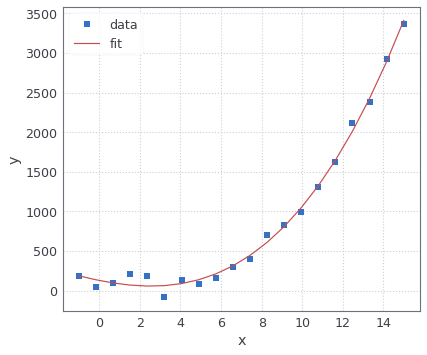

In [31]:
ax = plt.gca()
ax.plot(x,y, 's', label='data')
ax.plot(x,f, 'r-', label='fit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')

The key concepts:

- Objective function
    - relation to MLE/Bayes
- Regularization
    - raltion to priors
- Validation
- Bias and Variance
- Validation curves
- Training curves
- Summary


further topic (beyond coursera ml)
- pipelines
- cross-validation
- models (random forest...)
- ensembles
- boosting